Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [5]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [7]:
# Defining the path for train and test images
from google.colab import drive
drive.mount('/content/drive')
data_dir_train = pathlib.Path("/content/drive/My Drive/app/Melanoma_Data/Train")
data_dir_test = pathlib.Path('/content/drive/My Drive/app/Melanoma_Data/Test')

Mounted at /content/drive


In [32]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/app/Melanoma_Data/Train",
    validation_split=0.2,           # 20% for validation
    subset="training",              # Specify this subset is for training
    seed=123,
    image_size=(img_height, img_width),# Resize images to (180, 180)
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/app/Melanoma_Data/Train",
    validation_split=0.2,           # 20% for validation
    subset="validation",              # Specify this subset is for training
    seed=123,
    image_size=(img_height, img_width),# Resize images to (180, 180)
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/app/Melanoma_Data/Test",
    image_size=(img_height, img_width),# Resize images to (180, 180)
    batch_size=batch_size
)

Found 118 files belonging to 9 classes.


In [12]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

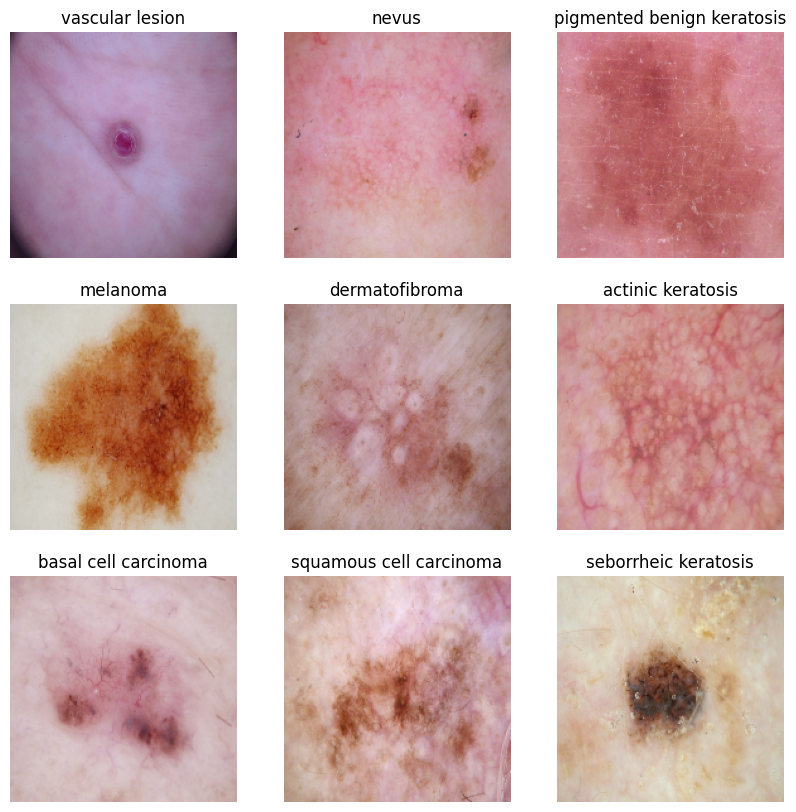

In [ ]:
import matplotlib.pyplot as plt

def plot_images(dataset):
  # Dictionary to store image from each class
  images_per_class = {}

  for images,labels in dataset:
    for image,label in zip(images,labels):
      class_name = class_names[label]
      if class_name not in images_per_class:
          images_per_class[class_name] = image
      if len(images_per_class) == len(class_names):  # Stop when we have one example for each class
          break
    if len(images_per_class) == len(class_names):
        break

  # Plot one image per class
  plt.figure(figsize=(10, 10))
  for i, (class_name, image) in enumerate(images_per_class.items()):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(image.numpy().astype("uint8"))
      plt.title(class_name)
      plt.axis("off")
  plt.show()

plot_images(train_ds)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
input_shape = (180,180,3)

inputs = keras.Input(shape=input_shape)
lr = layers.Rescaling(scale=1.0/255)(inputs)

lr = layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding="same", activation="relu")(lr)
lr = layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding="same", activation="relu")(lr)
lr = layers.MaxPooling2D(pool_size=(2,2))(lr)
lr = layers.BatchNormalization()(lr)

lr = layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding="same", activation="relu")(lr)
lr = layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding="same", activation="relu")(lr)
lr = layers.MaxPooling2D(pool_size=(2,2))(lr)
lr = layers.BatchNormalization()(lr)

lr = layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding="same", activation="relu")(lr)

lr = layers.GlobalAveragePooling2D()(lr)
lr = layers.Flatten()(lr)
lr = layers.Dense(32, activation="relu")(lr)
lr = layers.Dense(16, activation="relu")(lr)

outputs = layers.Dense(len(class_names), activation="softmax")(lr)

model = keras.Model(inputs=inputs, outputs=outputs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 90, 90, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 90, 90, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 45, 45, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 45, 45, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,881 (155.79 KB)

 Trainable params: 39,753 (155.29 KB)

 Non-trainable params: 128 (512.00 B)

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 460s 5s/step - accuracy: 0.2731 - loss: 2.0306 - val_accuracy: 0.2282 - val_loss: 2.1716
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 291s 4s/step - accuracy: 0.4040 - loss: 1.6530 - val_accuracy: 0.1499 - val_loss: 2.2433
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.4018 - loss: 1.6248 - val_accuracy: 0.1499 - val_loss: 2.4077
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 249s 4s/step - accuracy: 0.4436 - loss: 1.5393 - val_accuracy: 0.1499 - val_loss: 2.4837
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.4422 - loss: 1.5050 - val_accuracy: 0.2841 - val_loss: 2.0346
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.4497 - loss: 1.4918 - val_accuracy: 0.1588 - val_loss: 2.3955
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.4562 - loss: 1.4776 - val_accuracy: 0.1790 - val_loss: 2.2130
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 277s 4s/step - accuracy: 0.4900 - loss: 1.4207 - val_accuracy: 0.2013 - v

### Visualizing training results

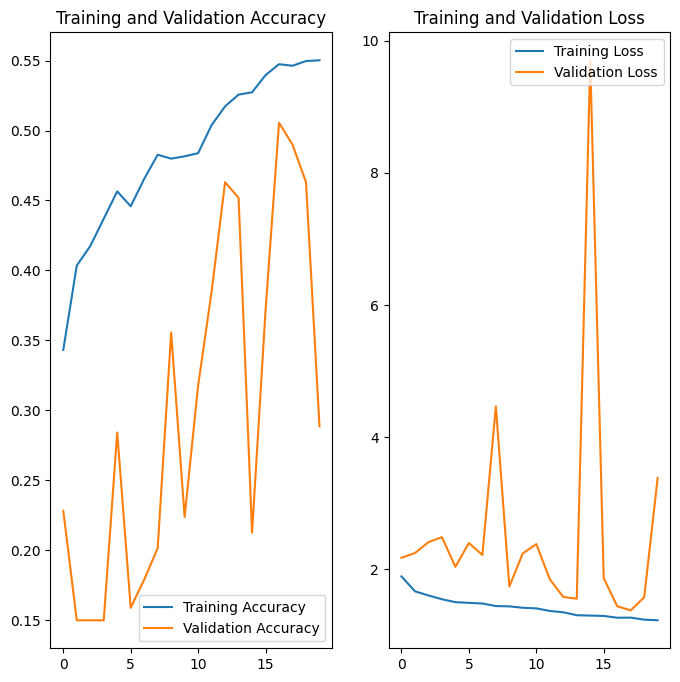

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Model is underfitting. Loss is going down. We can try to train more.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

# Create an ImageDataGenerator for data augmentation

input_shape = (180,180,3)
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,      # Image rotation
    horizontal_flip=True,    # Flipping image along horizontal axis
    vertical_flip=True,      # Flipping image along vertical axis
    validation_split=0.2
)

# No augmentation here in validation set. Only scaling here
val_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

img_class = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

# Load images from directory with augmentation applied to the training data
train_generator = datagen.flow_from_directory(
    data_dir_train,
    target_size=(180, 180),
    batch_size=32,
    classes = img_class,
    subset="training",  # Use the training subset
    seed=123
)

validation_generator = val_datagen.flow_from_directory(
    data_dir_train,
    target_size=(180, 180),
    batch_size=32,
    classes = img_class,
    subset="validation",  # Use the validation subset
    seed=123
)

img_size = (180, 180)

# Wrap the generator in a tf.data.Dataset
train_aug_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, *img_size, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, len(train_generator.class_indices)), dtype=tf.float32)
    )
)

validation_aug_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, *img_size, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, len(validation_generator.class_indices)), dtype=tf.float32)
    )
)

train_aug_dataset = train_aug_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_aug_dataset = validation_aug_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


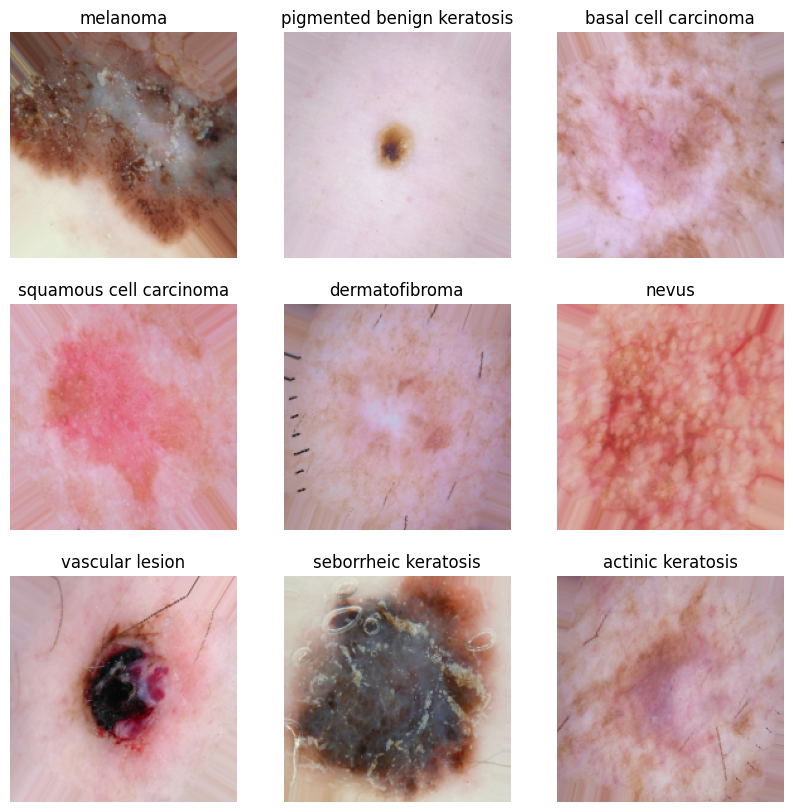

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
class_names = list(train_generator.class_indices.keys())

# Initialize a dictionary to store one example per class
images_per_class = {}

# Loop through batches to gather one example per class
for images, labels in train_generator:
    for image, label in zip(images, labels):
        class_index = np.argmax(label)  # Get class index from one-hot encoded label
        class_name = class_names[class_index]

        # If we don't have an example for this class, save it
        if class_name not in images_per_class:
            images_per_class[class_name] = image
        if len(images_per_class) == len(class_names):  # Stop when we have one example per class
            break
    if len(images_per_class) == len(class_names):
        break

# Plot one image per class
plt.figure(figsize=(10, 10))
for i, (class_name, image) in enumerate(images_per_class.items()):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis("off")
plt.show()

### Todo:
### Create the model, compile and train the model


In [ ]:
## Build Model
model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation="relu", input_shape=input_shape, padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(16, (3, 3), activation="relu", padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation="relu", padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(9, activation="softmax")  # 9 classes
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 180, 180, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 180, 180, 8)         │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 90, 90, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 45, 45, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       7,930,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,070,265 (30.79 MB)

 Trainable params: 8,070,153 (30.79 MB)

 Non-trainable params: 112 (448.00 B)

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


### Training the model

In [ ]:
# Training model with 20 epochs
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.2143 - loss: 7.5934 - val_accuracy: 0.1959 - val_loss: 2.7837
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.3032 - loss: 2.5942 - val_accuracy: 0.1959 - val_loss: 3.3640
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.3703 - loss: 1.9136 - val_accuracy: 0.1959 - val_loss: 3.7974
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.3533 - loss: 1.8486 - val_accuracy: 0.2410 - val_loss: 2.5996
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.3745 - loss: 1.8352 - val_accuracy: 0.2703 - val_loss: 2.1936
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.4134 - loss: 1.7512 - val_accuracy: 0.2815 - val_loss: 2.2498
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.4017 - loss: 1.7465 - val_accuracy: 0.2860 - val_loss: 2.1195
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.4316 - loss: 1.6811 - val_accuracy: 0.2297 - val_loss: 3.4661

### Visualizing the results

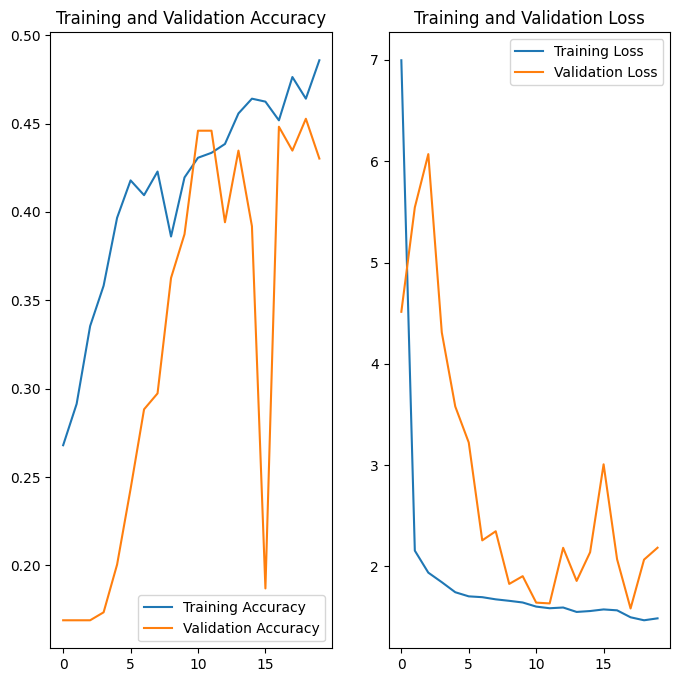

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

After augmentation, score has improved.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [13]:

from collections import defaultdict


# Initialize a dictionary to count the images per class
class_counts = defaultdict(int)
class_names = train_ds.class_names

# Iterate over the dataset to count each class
for images, labels in train_ds:
    for label in labels:
        class_counts[class_names[label]] += 1

# Print the count for each class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")

Class 'vascular lesion': 115 images
Class 'nevus': 277 images
Class 'pigmented benign keratosis': 370 images
Class 'melanoma': 352 images
Class 'dermatofibroma': 77 images
Class 'actinic keratosis': 92 images
Class 'basal cell carcinoma': 309 images
Class 'squamous cell carcinoma': 142 images
Class 'seborrheic keratosis': 58 images


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis, basal cell carcinoma, melanoma and nevus


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [14]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [15]:
path_to_training_dataset="/content/drive/My Drive/app/Melanoma_Data/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/app/Melanoma_Data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B935C0524D0>: 100%|██████████| 500/500 [00:06<00:00, 80.50 Samples/s] 


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/app/Melanoma_Data/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B937409A440>: 100%|██████████| 500/500 [00:05<00:00, 93.91 Samples/s] 


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/app/Melanoma_Data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B9B74739240>: 100%|██████████| 500/500 [00:04<00:00, 115.13 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/app/Melanoma_Data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B935C0508B0>: 100%|██████████| 500/500 [00:05<00:00, 83.54 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/app/Melanoma_Data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7B9374098040>: 100%|██████████| 500/500 [00:06<00:00, 74.50 Samples/s] 


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/app/Melanoma_Data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B935C089E70>: 100%|██████████| 500/500 [00:04<00:00, 113.17 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/app/Melanoma_Data/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B935C091000>: 100%|██████████| 500/500 [00:05<00:00, 97.31 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/app/Melanoma_Data/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B932805ACE0>: 100%|██████████| 500/500 [00:05<00:00, 95.02 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/app/Melanoma_Data/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B935C094040>: 100%|██████████| 500/500 [00:04<00:00, 101.06 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [16]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [17]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/My Drive/app/Melanoma_Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027884.jpg_5775b815-cc3c-4794-9d4b-6602473c1a2c.jpg',
 '/content/drive/My Drive/app/Melanoma_Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026729.jpg_c62abb99-9271-49ef-b27b-bd537fa5c5e3.jpg',
 '/content/drive/My Drive/app/Melanoma_Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033358.jpg_0e977ef0-076d-4c1a-ac63-18fd44629d40.jpg',
 '/content/drive/My Drive/app/Melanoma_Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028393.jpg_1c8c2362-54bd-4fd7-98e2-189f0f5a3b67.jpg',
 '/content/drive/My Drive/app/Melanoma_Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030825.jpg_66986fd1-d029-48cf-b5b4-bef84b11f5e9.jpg',
 '/content/drive/My Drive/app/Melanoma_Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031430.jpg_684ab782-bbea-4c64-9363-088e933caf03.jpg',
 '/content/drive/My Drive/ap

In [18]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [19]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [20]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [21]:
new_df['Label'].value_counts()

,count
Label,
actinic keratosis,500
basal cell carcinoma,500
dermatofibroma,500
melanoma,500
nevus,500
pigmented benign keratosis,500
seborrheic keratosis,500
squamous cell carcinoma,500
vascular lesion,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [22]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [23]:
data_dir_train="/content/drive/My Drive/app/Melanoma_Data/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/app/Melanoma_Data/Train",
    validation_split=0.2,           # 20% for validation
    subset="training",              # Specify this subset is for training
    seed=123,
    image_size=(img_height, img_width),# Resize images to (180, 180)
    batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [24]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [25]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [26]:
## Build Model
input_shape = (180,180,3)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape, padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(16, (3, 3), activation="relu", padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation="relu", padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(9, activation="softmax")  # 9 classes
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 180, 180, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 16)        4624      
                                                                 
 batch_normalization_1 (Bat  (None, 90, 90, 16)        64        
 chNormalization)                                                
                                                        

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [28]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
epochs = 30
batch_size = 32
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3,verbose=1,factor=0.5,min_lr=0.00001)

## Your code goes here, use 30 epochs.
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds, callbacks=[learning_rate_reduction]
)

Epoch 1/30
169/169 [==============================] - 63s 290ms/step - loss: 2.9943 - accuracy: 0.2383 - val_loss: 1.7457 - val_accuracy: 0.3385 - lr: 0.0010
Epoch 2/30
169/169 [==============================] - 47s 276ms/step - loss: 1.7796 - accuracy: 0.3422 - val_loss: 1.7139 - val_accuracy: 0.3393 - lr: 0.0010
Epoch 3/30
169/169 [==============================] - 47s 279ms/step - loss: 1.6460 - accuracy: 0.3889 - val_loss: 1.3818 - val_accuracy: 0.4907 - lr: 0.0010
Epoch 4/30
169/169 [==============================] - 47s 279ms/step - loss: 1.4875 - accuracy: 0.4392 - val_loss: 1.3888 - val_accuracy: 0.5085 - lr: 0.0010
Epoch 5/30
169/169 [==============================] - 47s 278ms/step - loss: 1.3740 - accuracy: 0.4872 - val_loss: 1.5912 - val_accuracy: 0.4298 - lr: 0.0010
Epoch 6/30
169/169 [==============================] - 47s 279ms/step - loss: 1.2320 - accuracy: 0.5323 - val_loss: 1.1736 - val_accuracy: 0.5783 - lr: 0.0010
Epoch 7/30
169/169 [==============================] 

#### **Todo:**  Visualize the model results

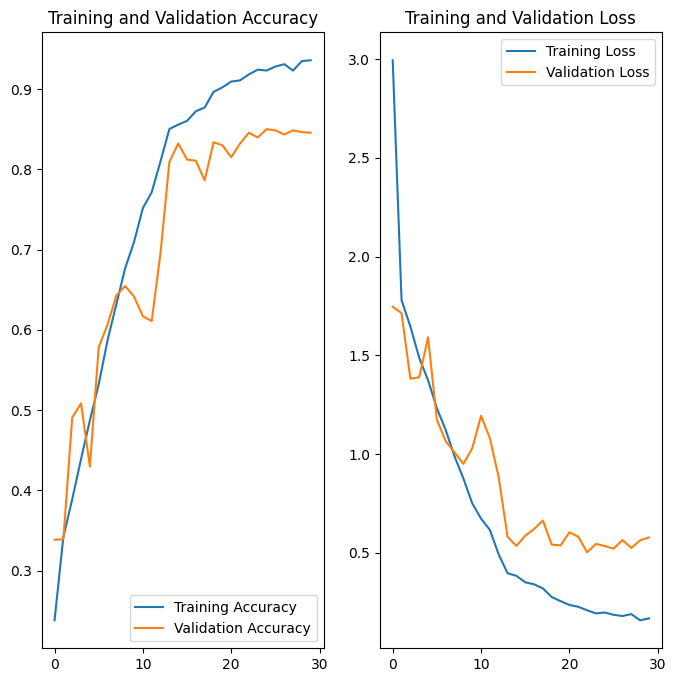

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
After handling data imbalance, score has improved significantly.

